## Setup Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Dataset Import + Initial Cleaning

### Initial Data Check

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
crash_df = pd.read_csv('./data/VDOT_crash.csv')

# if csv uploaded to google drive
# crash_df = pd.read_csv('/content/drive/My Drive/data/VDOT_crash.csv')

In [5]:
crash_df.head()

,OBJECTID,Document Nbr,Crash Year,Crash Date,Crash Military Time,Crash Severity,K_People,A_People,B_People,C_People,...,VSP,Ownership,Planning District,MPO Name,RTE Name,RNS MP,Node,Node Offset (ft),x,y
0,1,170785244,2017,3/15/2017 4:00:00 AM,845,O,0,0,0,0,...,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,S-VA121PR IVY AVE,0.59,731559.0,48.57,-76.415070,36.975935
1,2,173135321,2017,11/3/2017 4:00:00 AM,1718,O,0,0,0,0,...,1,1. State Hwy Agency,"Richmond Regional, Crater",RICH,R-VA020SC00651WB,9.83,203463.0,9.78,-77.509985,37.455126
2,3,173035461,2017,10/30/2017 4:00:00 AM,734,O,0,0,0,0,...,2,1. State Hwy Agency,Northern Shenandoah Valley,NaN,R-VA US00340NB,94.18,713190.0,84.94,-78.197568,38.908610
3,4,172925444,2017,10/19/2017 4:00:00 AM,511,O,0,0,0,0,...,1,1. State Hwy Agency,George Washington Regional,NaN,R-VA US00301NB,111.82,1168608.0,174.41,-77.341817,38.034672
4,5,172245260,2017,8/12/2017 4:00:00 AM,218,O,0,0,0,0,...,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA SR00337WB,1.26,469440.0,16.97,-76.577218,36.726416


So, our group decided to filter the crash year to be any time newer than 2021 to get a more accurate understanding of more recent times and trends.

In [6]:
filtered_crash_df = crash_df[crash_df["Crash Year"] >= 2021]
filtered_crash_df.head()

,OBJECTID,Document Nbr,Crash Year,Crash Date,Crash Military Time,Crash Severity,K_People,A_People,B_People,C_People,...,VSP,Ownership,Planning District,MPO Name,RTE Name,RNS MP,Node,Node Offset (ft),x,y
492995,492996,210235155,2021,1/23/2021 5:00:00 AM,1528,B,0,0,2,0,...,6,1. State Hwy Agency,West Piedmont,NaN,R-VA SR00057EB,11.59,1207241.0,10.67,-80.078479,36.751090
492996,492997,213645296,2021,12/30/2021 5:00:00 AM,1206,B,0,0,1,0,...,2,3. City or Town Hwy Agency,George Washington Regional,FRED,R-VA SR00003WBBUS001,0.02,1010915.0,236.85,-77.480568,38.294743
492997,492998,211415254,2021,5/20/2021 4:00:00 AM,1613,O,0,0,0,0,...,1,1. State Hwy Agency,Richmond Regional,RICH,R-VA IS00095SB,78.38,NaN,NaN,-77.461825,37.575069
492998,492999,211615171,2021,6/3/2021 4:00:00 AM,1452,O,0,0,0,0,...,5,1. State Hwy Agency,Hampton Roads,HAMP,R-VA IS00064WB,263.98,NaN,NaN,-76.391991,37.038167
492999,493000,211405033,2021,5/18/2021 4:00:00 AM,1755,O,0,0,0,0,...,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA IS00066WB,54.52,NaN,NaN,-77.413541,38.850280


In [7]:
filtered_crash_df.columns

Index(['OBJECTID', 'Document Nbr', 'Crash Year', 'Crash Date',
       'Crash Military Time', 'Crash Severity', 'K_People', 'A_People',
       'B_People', 'C_People', 'Persons Injured', 'Pedestrians Killed',
       'Pedestrians Injured', 'Vehicle Count', 'Collision Type',
       'Weather Condition', 'Light Condition', 'Roadway Surface Condition',
       'Relation To Roadway', 'Roadway Alignment', 'Roadway Surface Type',
       'Roadway Defect', 'Roadway Description', 'Intersection Type',
       'Traffic Control Type', 'Traffic Control Status', 'Work Zone Related',
       'Work Zone Location', 'Work Zone Type', 'School Zone',
       'First Harmful Event', 'First Harmful Event Loc', 'Alcohol?',
       'Animal Related?', 'Unrestrained?', 'Bike?', 'Distracted?', 'Drowsy?',
       'Drug Related?', 'Guardrail Related?', 'Hitrun?', 'Lgtruck?',
       'Motorcycle?', 'Pedestrian?', 'Speed?', 'Max Speed Diff',
       'RoadDeparture Type', 'Intersection Analysis', 'Senior?', 'Young?',
       'Main

And now, we decided to drop a few columns that don't actually matter too much. That includes some metadata like object ID, dates that don't really matter, location/jurisdiction information, virginia state patrol numbers, etc. that are irrelevant features for the actual model we intend on training!

In [8]:
dropped_crash = filtered_crash_df.drop(columns=['OBJECTID', 'Document Nbr', 'Crash Year', 'Crash Date', 'Crash Military Time', 'Work Zone Location', 'Work Zone Type', 'VDOT District', 'Juris Code', 'Physical Juris Name', 'VSP', 'Ownership', 'Planning District', 'MPO Name', 'RTE Name', 'RNS MP', 'Node', 'Node Offset (ft)'])
dropped_crash.head()

,Crash Severity,K_People,A_People,B_People,C_People,Persons Injured,Pedestrians Killed,Pedestrians Injured,Vehicle Count,Collision Type,...,Senior?,Young?,Mainline?,Night?,Functional Class,Facility Type,Area Type,SYSTEM,x,y
492995,B,0,0,2,0,2,0,0,2,3. Head On,...,Yes,Yes,Yes,No,"4-Minor Arterial (H,3)",3-Two-Way Undivided,Rural,VDOT Primary,-80.078479,36.751090
492996,B,0,0,1,0,1,0,0,2,1. Rear End,...,Yes,No,Yes,No,"4-Minor Arterial (H,3)",4-Two-Way Divided,Urban,NonVDOT primary,-77.480568,38.294743
492997,O,0,0,0,0,0,0,0,3,1. Rear End,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-77.461825,37.575069
492998,O,0,0,0,0,0,0,0,1,9. Fixed Object - Off Road,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-76.391991,37.038167
492999,O,0,0,0,0,0,0,0,3,1. Rear End,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-77.413541,38.850280


In [9]:
dropped_crash['Crash Severity'].unique()

array(['B', 'O', 'A', 'C', 'K'], dtype=object)

Ok so the crash severities are actually:  
K: Fatal  
B: Visible Injury  
A: Severe  
C: Nonvisible Injury  
O: Property Damage Only  
according to the [VDOT details set](https://www.virginiaroads.org/datasets/VDOT::crash-data-1/explore?layer=1). So I'll change them to that for the purposes of better visualization.

In [10]:
dropped_crash['Crash Severity'] = dropped_crash['Crash Severity'].replace({'K': 'Fatal', 'B': 'Visible Injury', 'A': 'Severe Injury', 'C': 'Nonvisible Injury', 'O': 'Property Damage Only'})

Let's also see the breakdown of the crash severities to get the counts for each one.

In [19]:
dropped_crash['Crash Severity'].value_counts()

Crash Severity
Property Damage Only    365664
Visible Injury          102333
Nonvisible Injury        38257
Severe Injury            25521
Fatal                     3810
Name: count, dtype: int64

Which makes sense - there aren't very many more severe crashes!

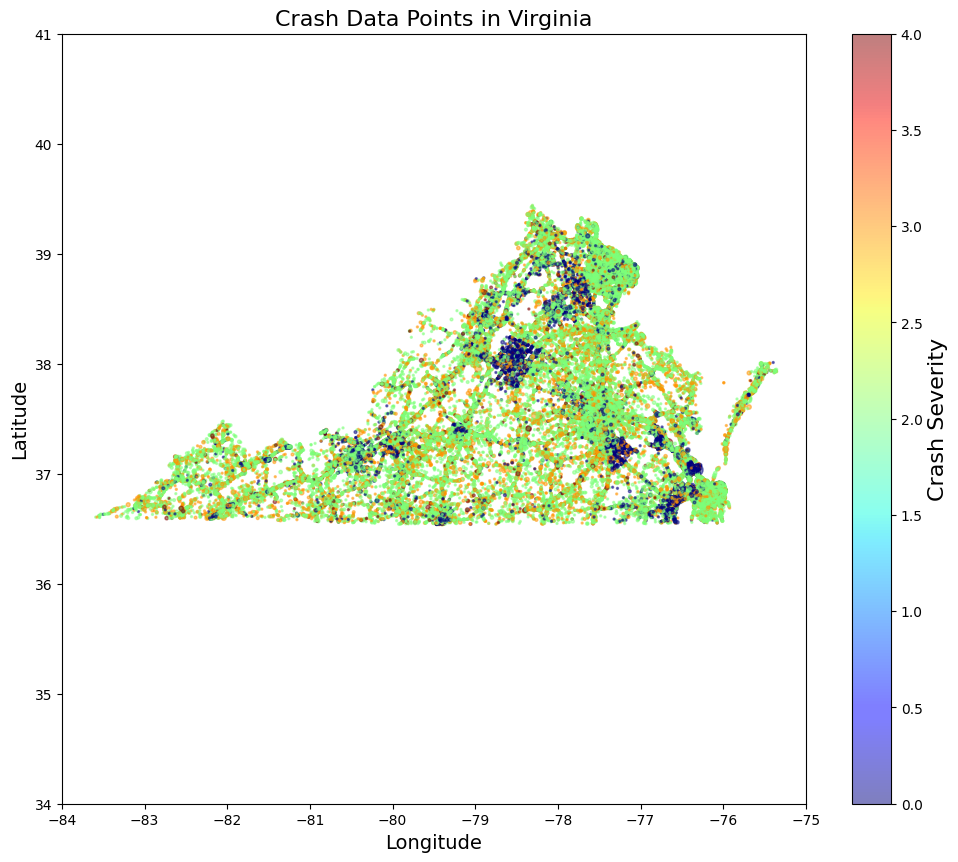

In [17]:
%matplotlib inline
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.image as mpimg

#Plotting locations of the crashes, highlighting the number of people injured (by the size of the point) and crash severity (by the color)
crash_data = dropped_crash.copy()
crash_data = crash_data.dropna(subset=['x', 'y'])
plt.figure(figsize=(12, 10))

severity_map = {
    "Nonvisible Injury": 0,
    "Property Damage Only": 1,
    "Visible Injury": 2,
    "Severe Injury": 3,
    "Fatal": 4
}
crash_nums = crash_data['Crash Severity'].map(severity_map)

plt.scatter(
    crash_data['x'],
    crash_data['y'],
    s=crash_data['Persons Injured'] * 2,
    c=crash_nums,
    cmap=plt.get_cmap("jet"),
    alpha=0.5
)

plt.title('Crash Data Points in Virginia', fontsize=16)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
cbar = plt.colorbar()
cbar.set_label('Crash Severity', fontsize=16)
plt.xlim(-84, -75)
plt.ylim(34, 41)
plt.show()

And some basic visualizations - both of the histogram of numerical datapoints to see what the trend of the data seems to be, as well as a map visualization because I think it looks cool :)

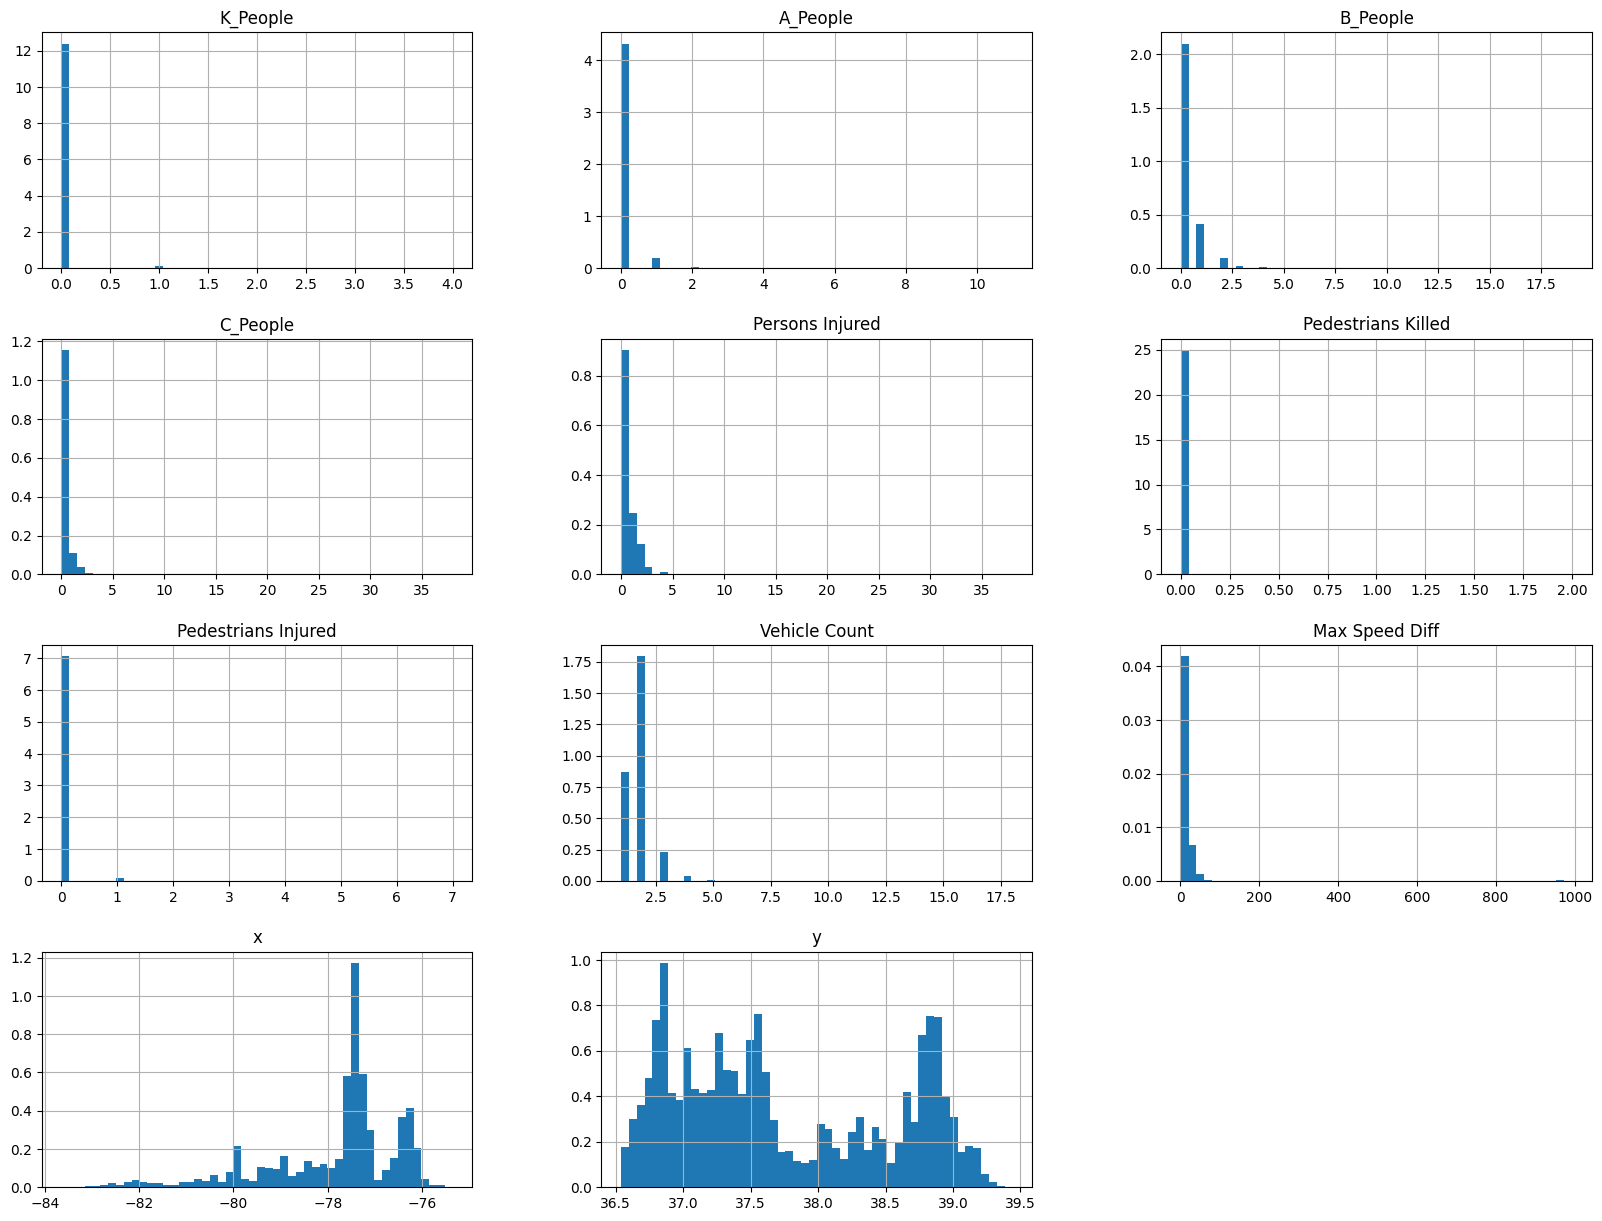

In [ ]:
dropped_crash.hist(bins=50, figsize=(20,15), density=True)
plt.show()

### Null Handling

In [ ]:
dropped_crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535585 entries, 492995 to 1028579
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Crash Severity             535585 non-null  object 
 1   K_People                   535585 non-null  int64  
 2   A_People                   535585 non-null  int64  
 3   B_People                   535585 non-null  int64  
 4   C_People                   535585 non-null  int64  
 5   Persons Injured            535585 non-null  int64  
 6   Pedestrians Killed         535585 non-null  int64  
 7   Pedestrians Injured        535585 non-null  int64  
 8   Vehicle Count              535585 non-null  int64  
 9   Collision Type             535585 non-null  object 
 10  Weather Condition          535585 non-null  object 
 11  Light Condition            535585 non-null  object 
 12  Roadway Surface Condition  535585 non-null  object 
 13  Relation To Roadway        5

In [ ]:
dropped_crash.isnull().sum()

,0
Crash Severity,0
K_People,0
A_People,0
B_People,0
C_People,0
Persons Injured,0
Pedestrians Killed,0
Pedestrians Injured,0
Vehicle Count,0
Collision Type,0


Ok. Looks like there are a couple nulls. It's truncated, but from looking at it in a text editor:

Roadway Alignment - 2  
Max Speed Diff - 427108   
Functional Class - 6969   
Facility Type - 10695  
x - 5    
y - 5   

So going down the list one by one:

Let's start with Roadway Alignment.

In [ ]:
dropped_crash['Roadway Alignment'].unique()

array(['1. Straight - Level', '6. Hillcrest - Curve',
       '3. Grade - Straight', '2. Curve - Level', '4. Grade - Curve',
       '7. Dip - Straight', '5. Hillcrest - Straight', '10. On/Off Ramp',
       '8. Dip - Curve', '9. Other', nan], dtype=object)

Honestly there's only 2 NaNs, let's just drop them in this case.

In [ ]:
dropped_crash = dropped_crash.dropna(subset=['Roadway Alignment'])

Let's take a look at the Max Speed Diff description.

In [ ]:
dropped_crash['Max Speed Diff'].describe()

,Max Speed Diff
count,108476.000000
mean,16.711964
std,54.052119
min,1.000000
25%,5.000000
50%,10.000000
75%,20.000000
max,994.000000


Ah. That's probably it - the data only shows cases where the max speed difference is greater than 1. That is, if the driver was going under speed or at speed, it was likely put in as NaN - there's no way to particularly impute under speed values since there's no way to know, but imputing 0 here should be fair!

In [ ]:
filled_crash = dropped_crash.copy()
filled_crash['Max Speed Diff'] = filled_crash['Max Speed Diff'].fillna(0)

Great - next up on the list is the Functional Class entries. Here's what they are:

In [ ]:
filled_crash['Functional Class'].unique()

array(['4-Minor Arterial (H,3)', '1-Interstate (A,1)',
       '3-Principal Arterial - Other (E,2)', nan, '7-Local (J,6)',
       '6-Minor Collector (5)', '5-Major Collector (I,4)',
       '2-Principal Arterial - Other Freeways and Expressways (B)'],
      dtype=object)

Ok... little bit weird here. So functional class seems to be roughly what kind of place the crash occurred. I suppose in this case we can only consider one of two options - impute 'Unknown' or drop the columns. Since there are more than 10% of these being NaN's, let's just impute 'Unknown'.

In [ ]:
filled_crash['Functional Class'] = filled_crash['Functional Class'].fillna('Unknown')

Let's now move onto Facility Type.

In [ ]:
filled_crash['Facility Type'].unique()

array(['3-Two-Way Undivided', '4-Two-Way Divided', '1-One-Way Undivided',
       nan, '2-One-Way Divided', '5-Reversible Exclusively (e.g. 395R)'],
      dtype=object)

Ah man. Another one similar to functional class - for the sake of the argument but double this time, if we drop this that's losing about 20% of our potential data points. So I'll just impute 'Unknown'.

In [ ]:
filled_crash['Facility Type'] = filled_crash['Facility Type'].fillna('Unknown')

And lastly, for x and y?

In [ ]:
filled_crash['x'].describe()

,x
count,535578.000000
mean,-77.841877
std,1.412125
min,-83.647464
25%,-78.432405
50%,-77.457760
75%,-77.112222
max,-75.349082


In [ ]:
filled_crash['y'].describe()

,y
count,535578.000000
mean,37.744275
std,0.794399
min,36.539198
25%,37.043891
50%,37.535824
75%,38.590427
max,39.440270


Yeah... there's no obvious reason. Well, it's only 5 entries and obviously we can't do anything with imputation, so let's just drop these as it shouldn't affect things too much!

In [ ]:
filled_crash = filled_crash.dropna(subset=['x','y'])

In [ ]:
filled_crash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535578 entries, 492995 to 1028579
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Crash Severity             535578 non-null  object 
 1   K_People                   535578 non-null  int64  
 2   A_People                   535578 non-null  int64  
 3   B_People                   535578 non-null  int64  
 4   C_People                   535578 non-null  int64  
 5   Persons Injured            535578 non-null  int64  
 6   Pedestrians Killed         535578 non-null  int64  
 7   Pedestrians Injured        535578 non-null  int64  
 8   Vehicle Count              535578 non-null  int64  
 9   Collision Type             535578 non-null  object 
 10  Weather Condition          535578 non-null  object 
 11  Light Condition            535578 non-null  object 
 12  Roadway Surface Condition  535578 non-null  object 
 13  Relation To Roadway        5

In [ ]:
filled_crash.isnull().sum()

,0
Crash Severity,0
K_People,0
A_People,0
B_People,0
C_People,0
Persons Injured,0
Pedestrians Killed,0
Pedestrians Injured,0
Vehicle Count,0
Collision Type,0


And so now all the nulls are handled, and we have dropped all irrelevant columns. Great!

### Saving Filtered Dataset

In [ ]:
# filled_crash.to_csv('./data/VDOT_crash_cleaned.csv', index=False)

### imputing pipeline

In [ ]:
filled_crash.head()

,Crash Severity,K_People,A_People,B_People,C_People,Persons Injured,Pedestrians Killed,Pedestrians Injured,Vehicle Count,Collision Type,...,Senior?,Young?,Mainline?,Night?,Functional Class,Facility Type,Area Type,SYSTEM,x,y
492995,Visible Injury,0,0,2,0,2,0,0,2,3. Head On,...,Yes,Yes,Yes,No,"4-Minor Arterial (H,3)",3-Two-Way Undivided,Rural,VDOT Primary,-80.078479,36.751090
492996,Visible Injury,0,0,1,0,1,0,0,2,1. Rear End,...,Yes,No,Yes,No,"4-Minor Arterial (H,3)",4-Two-Way Divided,Urban,NonVDOT primary,-77.480568,38.294743
492997,Property Damage Only,0,0,0,0,0,0,0,3,1. Rear End,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-77.461825,37.575069
492998,Property Damage Only,0,0,0,0,0,0,0,1,9. Fixed Object - Off Road,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-76.391991,37.038167
492999,Property Damage Only,0,0,0,0,0,0,0,3,1. Rear End,...,No,No,Yes,No,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,-77.413541,38.850280


## Neural Network Model

maybe some more cleaning... and want to avoid anti leakage since we're also training a random forest model here
1. dropping other columns that the other model might have added
2. drop post crash variables such as police summary and most importantly vars about the severity of the crash (since that's our target!)
3. using only features available at crash time
4. splitting the data by time might also avoid leakage... there is also a potential for spatial leakage (from temporal/spatial overlap)
5. preprocessing must only be fitted on training folds in cross validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

new_crashes = filled_crash.copy()
new_crashes_nn = new_crashes.copy()


In [ ]:
# preprocessing for NN model

# i'm using vars so we can change easily if this overfits
TARGET = "Crash Severity"   # multiclass target ...
RANDOM_STATE = 42
TEST_SIZE = 0.2
VAL_SPLIT = 0.2
TOP_K_FEATURES = 256 # have to do more bc its severely underfitting
L2 = 1e-4
DROPOUT = 0.2
EPOCHS = 60
BATCH_SIZE = 256

# dropping leakage + low signal columns
# the columns in leakage directly describe injury counts or outcomes
leakage = [
    "K_People","A_People","B_People","C_People","Persons Injured",
    "Pedestrians Killed","Pedestrians Injured"
]

maybe_unhelpful = [
    "SYSTEM"  # yea ngl idk what this system variable is for
]

# note- if we want to use location, we'd keep x,y but otherwise we could grid/cluster them first ... i lowkey am impartial

to_drop = [c for c in leakage + maybe_unhelpful if c in new_crashes_nn.columns]

# dropping columns with extremely low variance (constant columns)
const_cols = [c for c in new_crashes_nn.columns if new_crashes_nn[c].nunique(dropna=False) <= 1]
to_drop += [c for c in const_cols if c != TARGET]

to_drop = sorted(set(to_drop))
new_crashes_nn = new_crashes_nn.drop(columns=to_drop, errors="ignore")

In [ ]:
from sklearn.cluster import KMeans
# more feature engineering like clustering locations, bucketing speeds, etc.
# (a) spatial KMeans cluster on x,y (only if both exist and non-null)
if set(["x","y"]).issubset(new_crashes_nn.columns):
    xy = new_crashes_nn[["x","y"]].copy()
    # Impute missing coords with column medians (very rare usually)
    xy = xy.fillna(xy.median(numeric_only=True))
    km = KMeans(n_clusters=100, random_state=RANDOM_STATE, n_init="auto")
    new_crashes_nn["loc_cluster"] = km.fit_predict(xy)
else:
    new_crashes_nn["loc_cluster"] = 0  # fallback single bin if coords missing

# (b) Speed bands from Max Speed Diff
if "Max Speed Diff" in new_crashes_nn.columns:
    bins = [-np.inf, 0, 5, 10, 20, 35, 50, np.inf]
    labels = ["<=0","(0,5]","(5,10]","(10,20]","(20,35]","(35,50]","(50,+)"]
    new_crashes_nn["speed_diff_bin"] = pd.cut(new_crashes_nn["Max Speed Diff"], bins=bins, labels=labels, include_lowest=True)
else:
    new_crashes_nn["speed_diff_bin"] = "unknown"

# (c) Weather buckets from 'Weather Condition'
def bucket_weather(s):
    s = str(s).lower()
    if any(k in s for k in ["rain","drizzle","shower"]): return "rain"
    if any(k in s for k in ["snow","sleet","ice"]):      return "snow"
    if any(k in s for k in ["fog","mist","haze"]):       return "fog"
    if any(k in s for k in ["clear","no adverse"]):      return "clear"
    if any(k in s for k in ["wind","storm","thunder","hail"]): return "storm/wind"
    return "other"
if "Weather Condition" in new_crashes_nn.columns:
    new_crashes_nn["weather_bucket"] = new_crashes_nn["Weather Condition"].apply(bucket_weather)
else:
    new_crashes_nn["weather_bucket"] = "unknown"

# (d) Light buckets from 'Light Condition' + 'Night?'
def bucket_light(s):
    s = str(s).lower()
    if "dark" in s or "night" in s: return "night"
    if "dawn" in s or "dusk" in s or "twilight" in s: return "dusk/dawn"
    if "day" in s or "daylight" in s: return "day"
    return "other"
if "Light Condition" in new_crashes_nn.columns:
    new_crashes_nn["light_bucket"] = new_crashes_nn["Light Condition"].apply(bucket_light)
else:
    new_crashes_nn["light_bucket"] = np.where(new_crashes_nn.get("Night?", False)==True, "night", "day") if "Night?" in new_crashes_nn.columns else "other"

# Interaction that often matters for crashes
new_crashes_nn["night_and_rain"] = np.where((new_crashes_nn["light_bucket"]=="night") & (new_crashes_nn["weather_bucket"]=="rain"), 1, 0)

# (e) Collapse rare categories on a few noisy high-cardinality columns
def collapse_rare(series, min_frac= 0.01): # collapse categorical levels that r <1%
    freq = series.value_counts(dropna=False, normalize=True)
    keep = set(freq[freq >= min_frac].index.tolist())
    return series.where(series.isin(keep), other="__OTHER__")

for col in [
    "Collision Type","Roadway Description","Intersection Type",
    "Traffic Control Type","Traffic Control Status","Relation To Roadway",
    "Roadway Alignment","Roadway Surface Type","Roadway Surface Condition",
    "Roadway Defect","First Harmful Event","First Harmful Event Loc",
    "Functional Class","Facility Type","Area Type"
]:
    if col in new_crashes_nn.columns and new_crashes_nn[col].dtype == "object":
        new_crashes_nn[col] = collapse_rare(new_crashes_nn[col].astype(str))

In [ ]:
# train test split and label encode y
X = new_crashes_nn.drop(columns=[TARGET])
y = new_crashes_nn[TARGET].astype(str)  # make sure categorical, then encode

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=TEST_SIZE, stratify=y_enc, random_state=RANDOM_STATE
)

In [ ]:
# pipeline preprocessing
# keeping it simple (prayge)
cat_cols = X_train.select_dtypes(include=["object","category","bool"]).columns.tolist()
num_cols = X_train.select_dtypes(exclude=["object","category","bool"]).columns.tolist()

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
])
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# doing feature selection to reduce dimensionality tldr i don't want overfitting.
# mutual information = to quantify the relationship between each feature and the target variable, identifying features that provide the most predictive information
selector = SelectKBest(score_func=mutual_info_classif, k=min(256, X_train_prep.shape[1]))
X_train_sel = selector.fit_transform(X_train_prep, y_train)
X_test_sel  = selector.transform(X_test_prep)

input_dim = X_train_sel.shape[1]

# handling class imbalance with class weights

classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = {int(c): w for c, w in zip(classes, cw)}

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(sss.split(X_train_sel, y_train))
X_tr, X_val = X_train_sel[train_idx], X_train_sel[val_idx]
y_tr, y_val = y_train[train_idx], y_train[val_idx]

### Tensorflow NN Model

In [ ]:
from tensorflow.keras import regularizers

def build_model(input_dim, n_classes):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(L2)),
        layers.Dropout(DROPOUT),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(L2)),
        layers.Dropout(DROPOUT),
        layers.Dense(n_classes, activation="softmax"),
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=3e-4),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

n_classes = len(np.unique(y_train))
model = build_model(input_dim, n_classes)

# good to have early stopping to prevent overfitting once again
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [37]:
# time to actually train the model (PRAYGE)
history = model.fit(
    X_tr, y_tr,
    # validation_split=VAL_SPLIT,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3030 - loss: 1.5050 - val_accuracy: 0.3855 - val_loss: 1.3714
Epoch 2/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4015 - loss: 1.2976 - val_accuracy: 0.3979 - val_loss: 1.3547
Epoch 3/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4147 - loss: 1.2697 - val_accuracy: 0.4182 - val_loss: 1.2981
Epoch 4/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4119 - loss: 1.2705 - val_accuracy: 0.4676 - val_loss: 1.2242
Epoch 5/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4227 - loss: 1.2552 - val_accuracy: 0.4637 - val_loss: 1.2387
Epoch 6/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4217 - loss: 1.2462 - val_accuracy: 0.3936 - val_loss: 1.3358
Epoch 7/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4237 - loss: 1.2437 - val_accuracy: 0.4293 - val_loss: 1.2988
Epoch 8/60
1339/1339 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4314 - loss: 1.2414 -

In [38]:
from sklearn.metrics import classification_report

def search_bias_for_accuracy(y_true, proba, grid=(0.8, 0.9, 1.0, 1.1, 1.2)):
    C = proba.shape[1]
    best_acc, best_bias = -1, np.ones(C)
    # small grid to keep it fast
    for mult in grid:
        # try nudging each class individually
        for c in range(C):
            bias = np.ones(C)
            bias[c] = mult
            y_pred = (proba * bias[None, :]).argmax(axis=1)
            acc = accuracy_score(y_true, y_pred)
            if acc > best_acc:
                best_acc, best_bias = acc, bias.copy()
    return best_acc, best_bias

val_proba = model.predict(X_val, verbose=0)
best_val_acc, bias_vec = search_bias_for_accuracy(y_val, val_proba)

# Final test with tuned bias
tst_proba = model.predict(X_test_sel, verbose=0)
y_test_pred_raw = tst_proba.argmax(axis=1)
y_test_pred_tuned = (tst_proba * bias_vec[None, :]).argmax(axis=1)

raw_acc   = accuracy_score(y_test, y_test_pred_raw)
tuned_acc = accuracy_score(y_test, y_test_pred_tuned)

print("\n=== Accuracy Results ===")
print(f"Raw test accuracy:   {raw_acc:.4f}")
print(f"Tuned test accuracy: {tuned_acc:.4f}  (bias: {np.round(bias_vec,3)})")

print(f"\nF1 Score (tuned): {f1_score(y_test, y_test_pred_tuned, average='weighted')}")
print("\nConfusion matrix (tuned):")
print(confusion_matrix(y_test, y_test_pred_tuned))
print("\nPer-class report (tuned):")
print(classification_report(y_test, y_test_pred_tuned, target_names=le.classes_, zero_division=0))

print("\n--- Run summary ---")
print(f"Dropped columns: {to_drop}")
print(f"Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")
print(f"Train/Val/Test shapes (after selection): {X_tr.shape}, {X_val.shape}, {X_test_sel.shape}")
print(f"Classes: {list(le.classes_)}")


=== Accuracy Results ===
Raw test accuracy:   0.4703
Tuned test accuracy: 0.5326  (bias: [1.  1.  1.2 1.  1. ])

F1 Score (tuned): 0.5562641021648448

Confusion matrix (tuned):
[[  496    18    58   171    19]
 [  165  3955  2673   435   423]
 [ 1546 14782 48284  3510  5010]
 [ 1250   728  1168  1508   450]
 [ 1516  3709  9387  3043  2812]]

Per-class report (tuned):
                      precision    recall  f1-score   support

               Fatal       0.10      0.65      0.17       762
   Nonvisible Injury       0.17      0.52      0.26      7651
Property Damage Only       0.78      0.66      0.72     73132
       Severe Injury       0.17      0.30      0.22      5104
      Visible Injury       0.32      0.14      0.19     20467

            accuracy                           0.53    107116
           macro avg       0.31      0.45      0.31    107116
        weighted avg       0.62      0.53      0.56    107116


--- Run summary ---
Dropped columns: ['A_People', 'B_People', 'C_Pe

### NN Performance 
Accuracy was 45% and even after tuning to try to handle class imbalance it was 52%. Subpar results.

In [ ]:
import numpy as np
counts = np.bincount(y_train)
print("Class distribution:", counts, " Baseline:", counts.max()/counts.sum())


In [40]:
from sklearn.metrics import classification_report
# evaluation .
y_pred_proba = model.predict(X_test_sel)
y_pred = y_pred_proba.argmax(axis=1)
print(f"\nF1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


3348/3348 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

F1 Score: 0.5180186795666035

Confusion Matrix:
[[  496    21    40   176    29]
 [  165  4433  1860   467   726]
 [ 1577 18443 39358  4163  9591]
 [ 1252   822   839  1559   632]
 [ 1529  4490  6647  3273  4528]]

Classification Report:
                      precision    recall  f1-score   support

               Fatal       0.10      0.65      0.17       762
   Nonvisible Injury       0.16      0.58      0.25      7651
Property Damage Only       0.81      0.54      0.65     73132
       Severe Injury       0.16      0.31      0.21      5104
      Visible Injury       0.29      0.22      0.25     20467

            accuracy                           0.47    107116
           macro avg       0.30      0.46      0.31    107116
        weighted avg       0.63      0.47      0.52    107116



## XGBoost

In [41]:
import sys
print(sys.executable)

/usr/bin/python3


In [42]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective='mlogloss',
    eval_metric=['mlogloss','merror'],
    random_state=42,
    tree_method='hist',
    device='cuda'
)
xgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=100)
val_pred = xgb.predict(X_val)
val_f1 = f1_score(y_val, val_pred, average='weighted')

print(f"Val F1: {val_f1}")

[0]	validation_0-mlogloss:1.16731	validation_0-merror:0.30875
[99]	validation_0-mlogloss:0.75819	validation_0-merror:0.29160
Val F1: 0.6428109049396792


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [00:08:49] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [43]:
# from sklearn.metrics import balanced_accuracy_score

# Raw predictions
tst_pred = xgb.predict(X_test_sel)

# 1) F1
tst_f1 = f1_score(y_test, tst_pred, average='weighted')
print(f"Test F1: {tst_f1:.4f}")

# commenting this too since f1 inherently considers imbalance
# 2) Balanced accuracy (handles class imbalance)
# print("Balanced acc (test):", balanced_accuracy_score(y_test, tst_pred))

# 3) Per-class metrics
print("\nClassification report (test):")
print(classification_report(y_test, tst_pred, zero_division=0))

# 4) Confusion matrix (counts)
print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, tst_pred))

# going to comment this part beacuse I don't think we need this metric
# # 5) Optional: tune class-wise bias to max accuracy on val, then apply to test
# from sklearn.metrics import accuracy_score
# val_proba = xgb.predict_proba(X_val)
# tst_proba = xgb.predict_proba(X_test_sel)

# def tune_bias_for_accuracy(y_true, proba, grid=(0.9,1.0,1.1,1.2)):
#     C = proba.shape[1]
#     best_acc, best_bias = -1, np.ones(C)
#     for c in range(C):
#         for m in grid:
#             bias = np.ones(C); bias[c] = m
#             acc = accuracy_score(y_true, (proba*bias).argmax(axis=1))
#             if acc > best_acc:
#                 best_acc, best_bias = acc, bias.copy()
#     return best_acc, best_bias

# best_val_acc, bias_vec = tune_bias_for_accuracy(y_val, val_proba)
# tuned_test_pred = (tst_proba * bias_vec).argmax(axis=1)
# print(f"\nTest accuracy (bias-tuned): {accuracy_score(y_test, tuned_test_pred):.4f}  bias={np.round(bias_vec,3)}")

Test F1: 0.6461

Classification report (test):
              precision    recall  f1-score   support

           0       0.37      0.13      0.19       762
           1       0.53      0.25      0.34      7651
           2       0.74      0.97      0.84     73132
           3       0.42      0.16      0.23      5104
           4       0.50      0.13      0.20     20467

    accuracy                           0.71    107116
   macro avg       0.51      0.33      0.36    107116
weighted avg       0.66      0.71      0.65    107116


Confusion matrix (test):
[[   98     9   244   217   194]
 [    4  1927  5341   105   274]
 [   19  1063 70723   266  1061]
 [   94   324  2785   811  1090]
 [   50   330 16964   531  2592]]


Below is hyperparameter tuning code. This ran for 4 hours on the L4 GPU, so please for the love of god don't rerun this if you value your time. Commented it out so that it doesn't rerun again on a "run all". You'll just have to trust that the best params outputted were:
{'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}

Or if you don't trust have fun running! :D

In [44]:
# import xgboost
# from xgboost import XGBClassifier
# xgb = XGBClassifier(
#     n_estimators=1000,
#     learning_rate=0.05,
#     reg_lambda=1.0,
#     objective='mlogloss',
#     eval_metric=['mlogloss','merror'],
#     random_state=42,
#     tree_method='hist',
#     device='cuda'
# )
# param_grid = {'max_depth': [5, 10, 15], 'subsample':[0.6, 0.8, 1], 'gamma': [0.5, 1], 'min_child_weight': [1, 5]}
# grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')
# grid_search.fit(X_tr, y_tr, eval_set=[(X_val, y_val)])
# best_xgboost_model = grid_search.best_estimator_
# print("Best Parameters: ", grid_search.best_params_)
# print("Best CV F1 Score:", grid_search.best_score_)

In [45]:
best_xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    reg_lambda=1.0,
    gamma=0.5,
    max_depth=5,
    min_child_weight=1,
    subsample=0.6,
    objective='mlogloss',
    eval_metric=['mlogloss','merror'],
    random_state=42,
    tree_method='hist',
    device='cuda'
)

best_xgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=100)
best_tst_pred = best_xgb.predict(X_test_sel)

# 1) F1
best_tst_f1 = f1_score(y_test, best_tst_pred, average='weighted')
print(f"Test F1: {best_tst_f1:.4f}")

# commenting this too since f1 inherently considers imbalance
# 2) Balanced accuracy (handles class imbalance)
# print("Balanced acc (test):", balanced_accuracy_score(y_test, tst_pred))

# 3) Per-class metrics
print("\nClassification report (test):")
print(classification_report(y_test, best_tst_pred, zero_division=0))

# 4) Confusion matrix (counts)
print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, best_tst_pred))


[0]	validation_0-mlogloss:1.30380	validation_0-merror:0.31726
[100]	validation_0-mlogloss:0.80224	validation_0-merror:0.29572
[200]	validation_0-mlogloss:0.77835	validation_0-merror:0.29369
[300]	validation_0-mlogloss:0.76975	validation_0-merror:0.29328
[400]	validation_0-mlogloss:0.76486	validation_0-merror:0.29216
[500]	validation_0-mlogloss:0.76163	validation_0-merror:0.29154
[600]	validation_0-mlogloss:0.75916	validation_0-merror:0.29128
[700]	validation_0-mlogloss:0.75753	validation_0-merror:0.29077
[800]	validation_0-mlogloss:0.75643	validation_0-merror:0.29051
[900]	validation_0-mlogloss:0.75547	validation_0-merror:0.29015
[999]	validation_0-mlogloss:0.75486	validation_0-merror:0.29007
Test F1: 0.6475

Classification report (test):
              precision    recall  f1-score   support

           0       0.34      0.13      0.18       762
           1       0.53      0.26      0.35      7651
           2       0.74      0.97      0.84     73132
           3       0.42      0.16 

## Random Forest Model
Random forest is another model we can use to solve this classification problem. It is relatively straight-forward to implement and requires less hassle with hyperparameter tuning, which is something we can all appreciate.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# not including validation data for now because of severe overfitting (potential data leakage?)
# X_val_rf = X_val.copy()
# y_val_rf = y_val.copy()

X_train_sel_rf = X_train_sel.copy()
X_test_sel_rf = X_test_sel.copy()

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, class_weight='balanced', criterion='log_loss')

random_forest_model.fit(X_train_sel_rf, y_train)

# y_pred_val = random_forest_model.predict(X_val_rf)

y_pred_test = random_forest_model.predict(X_test_sel_rf)

In [ ]:
# print("Validation Accuracy: ", accuracy_score(y_val, y_pred_val))
# print("Validation F1 Score: ", f1_score(y_val, y_pred_val, average='weighted'))
# print("Validation Confusion Matrix: \n", confusion_matrix(y_val, y_pred_val))

print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))
# cannot use default of binary because of multiclassification problem
# instead, use weighted because of uneven distribution of crash types
print("Test F1 Score: ", f1_score(y_test, y_pred_test, average='weighted'))
print("Test Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test))

While these metrics are not bad, we can improve them by tuning the hyperparameters of our model. That is, the external factors of our model beyond the data/features itself.

Now, hyperparam tuning is extremely slow. Thus, I'm gonna make use of a separate library because I realized that sklearn is only cpu-based, so gonna use cuml instead (which actually makes use of GPU accel :D)

Despite this, you're DEFINITELY not gonna want to rerun this code. So I've commented it out and instead just pasted what it spat out as the optimal hyperparams (you can uncomment and run it if you think I'm lying but it'll take a millenia)

In [ ]:
import cuml
from cuml.ensemble import RandomForestClassifier as GPURFClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200],     # gonna keep tree count low because otherwise RAM issue + also marginal benefit to more
#     'max_depth': [50, 75],    # how many levels before we stop splitting, select range of possible values
#     'min_samples_split': [2, 8, 15],    # min samples needed to split a node, range of values
# }

# grid_search = GridSearchCV(
#     GPURFClassifier(random_state=RANDOM_STATE, criterion='log_loss'),
#     param_grid,
#     cv=5,   # 5-fold cross-validation because 5cv is ambitious
#     scoring='f1_weighted',   # use weighted F1 for multiclass instead of accuracy?
# )

# grid_search.fit(X_train_sel_rf, y_train)
# # identify best model from combinations
# best_random_forest_model = grid_search.best_estimator_
# print("Best Parameters: ", grid_search.best_params_)
# print("Best CV F1 Score:", grid_search.best_score_)

# # use best model to predict for test set, then evaluate results
# y_best_pred_rf = best_random_forest_model.predict(X_test_sel_rf)

In [ ]:
# print("Random Forest Accuracy: ", accuracy_score(y_test, y_best_pred_rf))
# print("Confusion Matrix: \n", confusion_matrix(y_test, y_best_pred_rf))
# print("F1 Score: ", f1_score(y_test, y_best_pred_rf, average='weighted'))

Now, this cross validation code takes a long time (even on GPU), so I've just manually pulled the best parameters as the result. If you don't believe me you can run it yourself but otherwise this was the fastest way for my groupies to run it :)

In [53]:
best_rf = RandomForestClassifier(random_state=RANDOM_STATE, max_depth=75, min_samples_split=8, n_estimators=100, criterion='log_loss')
best_rf.fit(X_train_sel_rf, y_train)
y_best_pred_rf = best_rf.predict(X_test_sel_rf)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_best_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_best_pred_rf))
print("F1 Score: ", f1_score(y_test, y_best_pred_rf, average='weighted'))

Random Forest Accuracy:  0.705067403562493
Confusion Matrix: 
 [[   41     2   300   229   190]
 [    0  1098  6179    68   306]
 [    1   509 71207   228  1187]
 [   44   154  3109   676  1121]
 [   15   107 17364   479  2502]]
F1 Score:  0.6313824858319133


## Model Result Visualizations

###

Note that in the saved file here, the below plots don't show because the notebook didn't save them, but you can review them in the report as they have been included there. It is the feature importance plots.

### XGB Initial vs. Tuned

In [ ]:
import seaborn as sns

selected_mask = selector.get_support()
original_feature_names = preprocessor.get_feature_names_out()

# list of selected feature names
xgb_feature_names = original_feature_names[selected_mask].tolist()
print(f"Total selected features: {len(xgb_feature_names)}")

# matching 179, same features in order as they were before processing
print("XBG feature count: ", len(xgb.feature_importances_))

# get top 10 most important features
top_n = 10

xgb_scores_basic = xgb.feature_importances_
df_basic_imp = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': xgb_scores_basic
}).sort_values(by='Importance', ascending=False)

df_xgb_basic = df_basic_imp.head(top_n)

xgb_scores_best = best_xgb.feature_importances_
df_best_imp = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': xgb_scores_best
}).sort_values(by='Importance', ascending=False)

df_xgb_best = df_best_imp.head(top_n)

fig = sns.barplot(
    x='Importance',
    y='Feature',
    data=df_xgb_basic
)
fig.set(title='Initial XGB Feature Importances',
xlabel='Importance',
ylabel='Feature')
plt.show()

fig = sns.barplot(
    x='Importance',
    y='Feature',
    data=df_xgb_best
)
fig.set(title='Tuned XGB Feature Importances',
xlabel='Importance',
ylabel='Feature')
plt.show()

### Random Forest Initial vs. Tuned

In [ ]:
rf_scores_initial = random_forest_model.feature_importances_
df_initial_imp = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': rf_scores_initial
}).sort_values(by='Importance', ascending=False)
df_rf_initial = df_initial_imp.head(top_n)
fig = sns.barplot(
    x='Importance',
    y='Feature',
    data=df_rf_initial
)
fig.set(title='Initial Random Forest Feature Importances',
xlabel='Importance',
ylabel='Feature')
plt.show()

rf_scores_best = best_rf.feature_importances_
df_best_imp = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': rf_scores_best
}).sort_values(by='Importance', ascending=False)
df_rf_best = df_best_imp.head(top_n)
fig = sns.barplot(
    x='Importance',
    y='Feature',
    data=df_rf_best
)
fig.set(title='Finetuned Random Forest Feature Importances',
xlabel='Importance',
ylabel='Feature')
plt.show()

### Crash Severity Classifications of Finetuned Random Forest Model

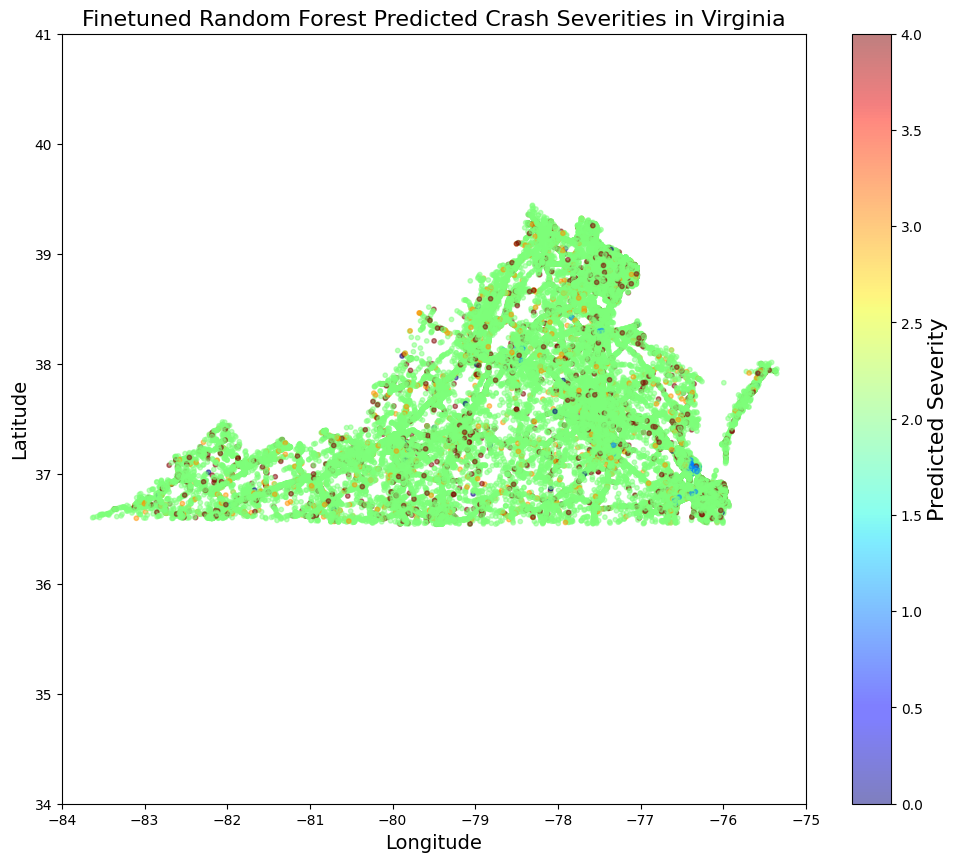

In [56]:
heatmap_df = pd.DataFrame(index=X_test.index)

heatmap_df['x'] = dropped_crash.loc[heatmap_df.index, 'x']
heatmap_df['y'] = dropped_crash.loc[heatmap_df.index, 'y']

# add our predicted classifications from finetuned RF model
heatmap_df['pred_rf'] = y_best_pred_rf

plt.figure(figsize=(12, 10))

plt.scatter(
    heatmap_df['x'],
    heatmap_df['y'],
    s=10,
    c=heatmap_df['pred_rf'], # color is based on predicted crash severity classification
    cmap=plt.get_cmap("jet"),
    alpha=0.5
)

plt.title('Finetuned Random Forest Predicted Crash Severities in Virginia', fontsize=16)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.xlim(-84, -75)
plt.ylim(34, 41)

cbar = plt.colorbar()
cbar.set_label('Predicted Severity', fontsize=16)
plt.show()